<center><h1>Olivetti Face Recognition</h1></center>

<br><br><br><br><br>

## Contents
<b>
    <ul>
        <li>1. Summary</li>
        <li>2. Face Recognition Using PCA</li>
        <li>
             3. Olivetti Face Dataset
            <ul>
                <li>3.1. Show 48 Disticnt People in the Olivetti Dataset</li>
                <li>3.2. Show 10 Face Images of Selected Target</li>
            </ul>
        </li>
    </ul>
</b>


## 1. Summary

In this study, face recognition was performed using the face images in the Olivetti data set. The steps for face recognition are as follows:
- Principal components of face images were obtained by PCA.
- Adequate number of principal components determined
- According to three different classification models, accuracy score obtained.
- According to three different classification models, cross-validation accuracy score were obtained.
- Parameter optimization of the best model has been made.
<br>

## 2. Face Recognition Using PCA

<p>
Global-based methods are applied to face recognition by researchers because they perform facial recognition without feature extraction which is troublesome in feature based methods. Globally based methods have been used in face recognition since the 1990s, since they significantly improve facial recognition efficiency. Kirby and Sirovich (1990) first developed a method known as Eigenface, which is used in facial representation and recognition based on Principal Component Analysis . With this method, Turk and Pentland transformed the entire face image into vectors and computed eigenfaces with a set of samples. PCA was able to obtain data representing the face at the optimum level with the data obtained from the image. The different facial and illumination levels of the same person were evaluated as the weakness point of PCA.
</p>

## 3. Olivetti Dataset

Brief information about Olivetti Dataset:
- Face images taken between April 1992 and April 1994.
- There are ten different image of each of 40 distinct people
- There are 400 face images in the dataset
- Face images were taken at different times, variying ligthing, facial express and facial detail
- All face images have black background
- The images are gray level
- Size of each image is 64x64
- Image pixel values were scaled to [0, 1] interval
- Names of 40 people were encoded to an integer from 0 to 39
<br>

<b>Importing necessary libraries<b>

The file ``requirements.txt`` contain the necessary libraries, so you need just to run this cell below.

In [1]:
%%capture
!pip install -r requirements.txt

Importing the necessary libraries such as numpy, pandas and scikit-learn and more.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_olivetti_faces
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from numpy.random import RandomState
from sklearn import decomposition
from sklearn.svm import SVC
from sklearn import metrics
from time import time

c:\python\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
c:\python\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


This amazing one is to make the plots in line its mean the plots will show in notebook whis ggplot style.

In [3]:
%matplotlib inline 
plt.style.use('ggplot')

Loading data.

In [4]:
data=np.load("data/olivetti_faces.npy")
target=np.load("data/olivetti_faces_target.npy")

Let's verify above information

In [5]:
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(data.shape[1],data.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0][0,:4]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [6]:
print("unique target number : ",np.unique(target))

unique target number :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


<br>

### 3.1. Show 48 Disticnt People in the Olivetti Dataset

In [7]:
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

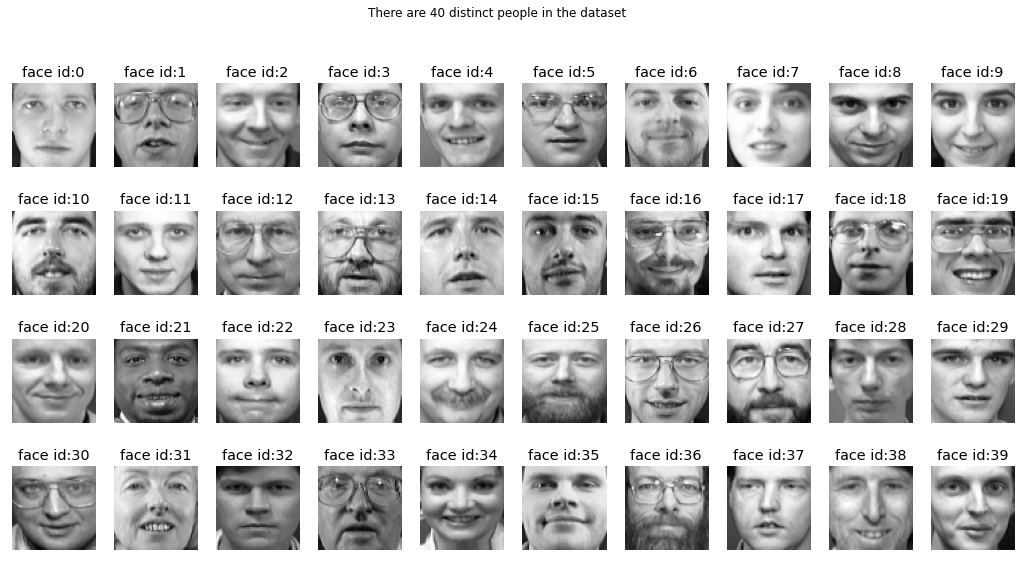

In [8]:
show_40_distinct_people(data, np.unique(target))

<p>As seen in the photo gallery above, the data set has 40 different person-owned, facial images.</p>

<br>

### 3.2. Show 10 Face Images of Selected Target

In [9]:
def show_10_faces_of_n_subject(images, subject_ids):
    # each subject has 10 distinct face images
    cols=10
    rows=(len(subject_ids)*10)/cols
    rows=int(rows)
    # rowsx10 dimensions
    # print('{} x {}'.format(rows, cols))
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    # axarr=axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))

You can playaround ``subject_ids`` to see other people faces

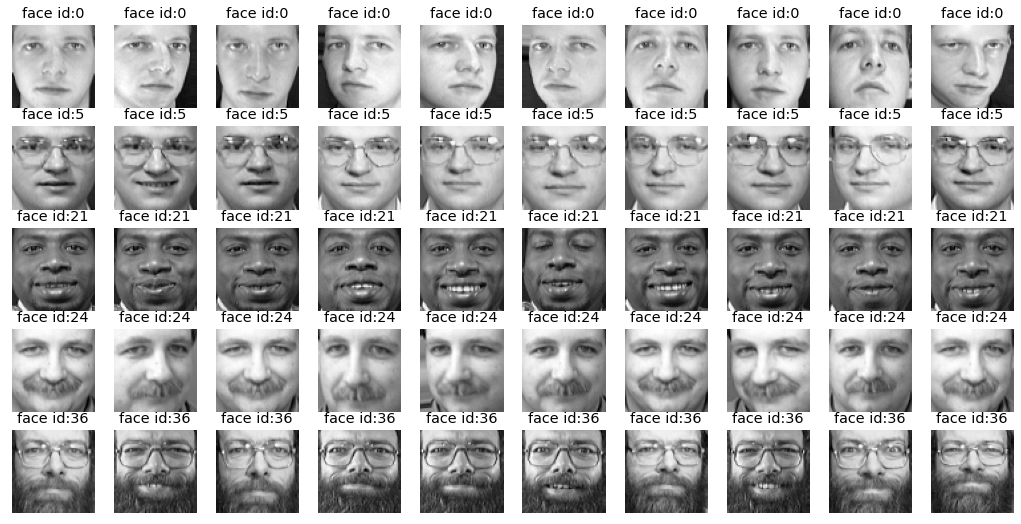

In [10]:
show_10_faces_of_n_subject(images=data, subject_ids=[0, 5, 21, 24, 36])

<p>
Each face of a subject has different characteristic in context of varying lighting, facial express and facial detail(glasses, beard)
</p>
<br>

## 4. Machine Learning Model fo Face Recognition

Machine learning models can work on vectors. Since the image data is in the matrix form, it must be converted to a vector.

In [11]:
# We reshape images for machine learnig  model
X = data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("data shape:",data.shape)
print("X shape:",X.shape)

data shape: (400, 64, 64)
X shape: (400, 4096)


<br>

### 4.1. Split data and target into Random train and test Subsets

<p>
The data set contains 10 face images for each subject. Of the face images, 70 percent will be used for training, 30 percent for testing. Uses stratify feature to have equal number of training and test images for each subject. Thus, there will be 7 training images and 3 test images for each subject. You can play with training and test rates.
</p>

In [12]:
X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:",y_train.shape)
print("X_test shape:",X_test.shape)
print("y_test shape:",y_test.shape)

X_train shape: (280, 4096)
y_train shape: (280,)
X_test shape: (120, 4096)
y_test shape: (120,)


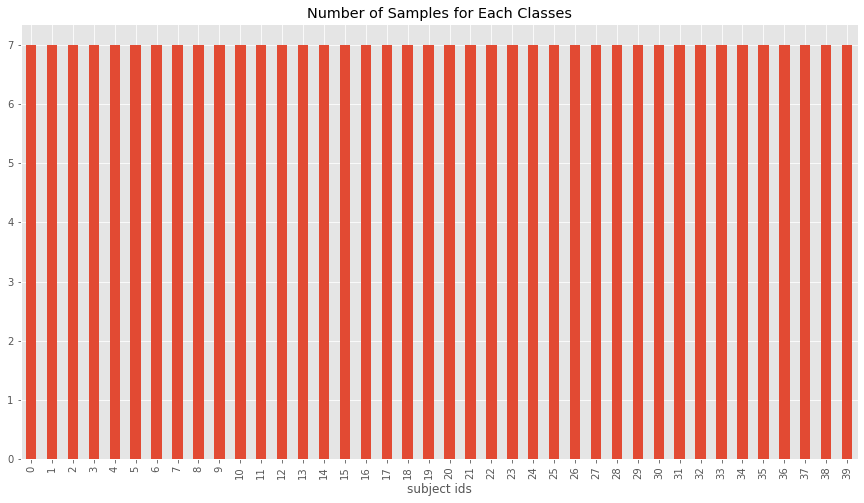

In [13]:
y_frame=pd.DataFrame()
y_frame['subject ids']=y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")

<br>

### 4.2. Principle Component Analysis

<p>
    The most common unsupervised transformation applications is to reduce data size. In the size reduction process, the dimension of the data reduced.
</p>
<p>
    Principle Component Analysis (PCA) is a method that allows data to be represented in a lesser size. According to this method, the data is transformed to new components and the size of the data is reduced by selecting the most important components.
</p>

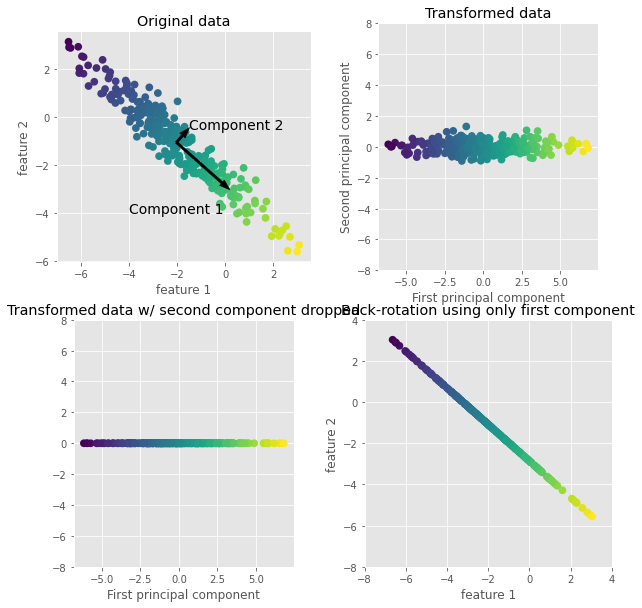

In [14]:
# scree plot
mglearn.plots.plot_pca_illustration()

The above illustration shows a simple example on a synthetic two-dimensional data set. The first drawing shows the original data points colored to distinguish points. The algorithm first proceeds by finding the direction of the maximum variance labeled ```Component 1```. This refers to the direction in which most of the data is associated, or in other words, the properties that are most related to each other.
<br>
Then, when the algorithm is orthogonal (at right angle), it finds the direction that contains the most information in the first direction. There are only one possible orientation in two dimensions at a right angle, but there will be many orthogonal directions (infinite) in high dimensional spaces.


<br>

### 4.3. PCA Projection of Defined Number of Target

In [15]:
pca=PCA(n_components=2)
print("=> ", pca)
pca.fit(X)
X_pca=pca.transform(X)
print("=> ", X_pca.shape)
print("=> ", X.shape)

=>  PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
=>  (400, 2)
=>  (400, 4096)


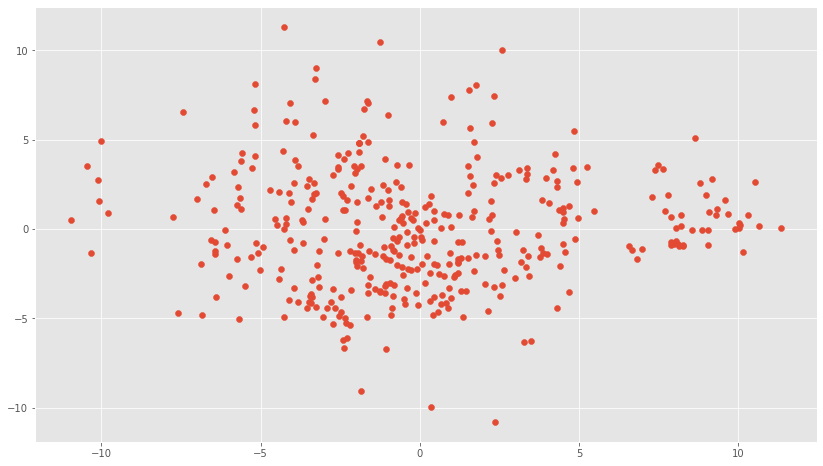

In [16]:
fig, axes = plt.subplots(figsize=(14 ,8))
plt.scatter(x=X_pca[0:, 0], y=X_pca[0:, 1])
plt.show()

In [17]:
# print(X_pca[0:, 1])

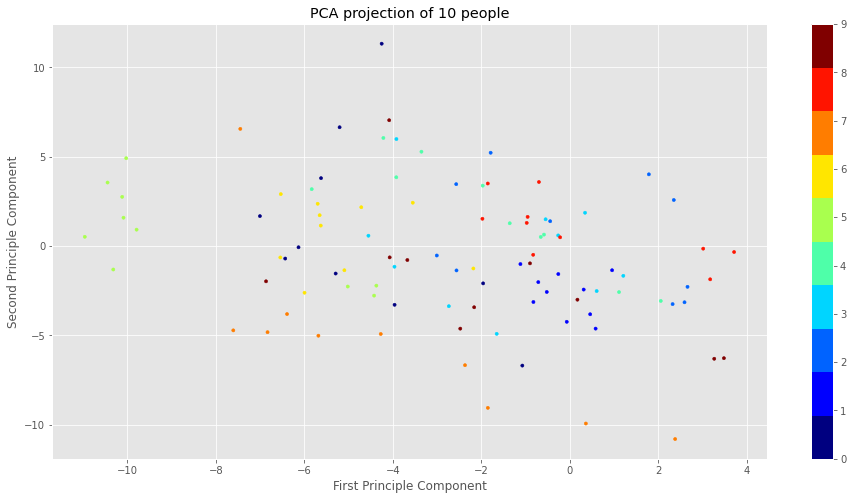

In [18]:
number_of_people=10
index_range=number_of_people*10
fig=plt.figure(figsize=(16,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_pca[:index_range,0],
            X_pca[:index_range,1], 
            c=target[:index_range],
            s=10,
            cmap=plt.get_cmap('jet', number_of_people))

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

<br>

### 4.4. Finding Optimum Number of Principle Component

This is important step because in this step we choose the number of principles components that is useful to fit the model.

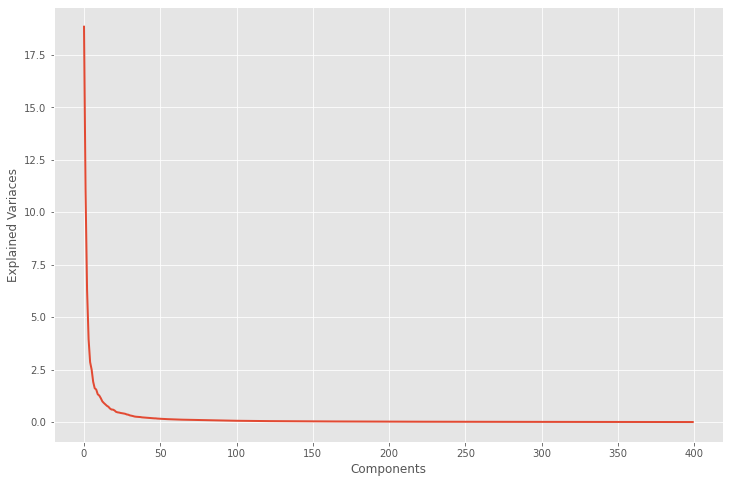

In [19]:
pca=PCA()
pca.fit(X)
plt.figure(1, figsize=(12,8))
# print(pca.explained_variance_)
plt.plot(pca.explained_variance_, linewidth=2)
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In the figure above, it can be seen that 90 and more PCA components represent the same data. Now let's make the classification process using 90 PCA components.

In [20]:
n_components=90

In [21]:
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=90, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

<br>

### 4.5. Show Average Face

Text(0.5, 1.0, 'Average Face')

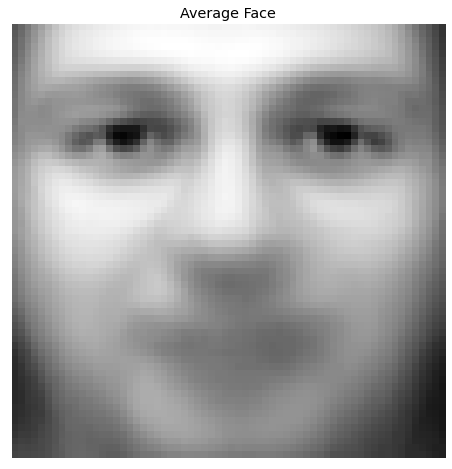

In [22]:
fig, ax=plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

<br>

### 4.6. Show Eigen Faces

Text(0.5, 0.98, 'All Eigen Faces')

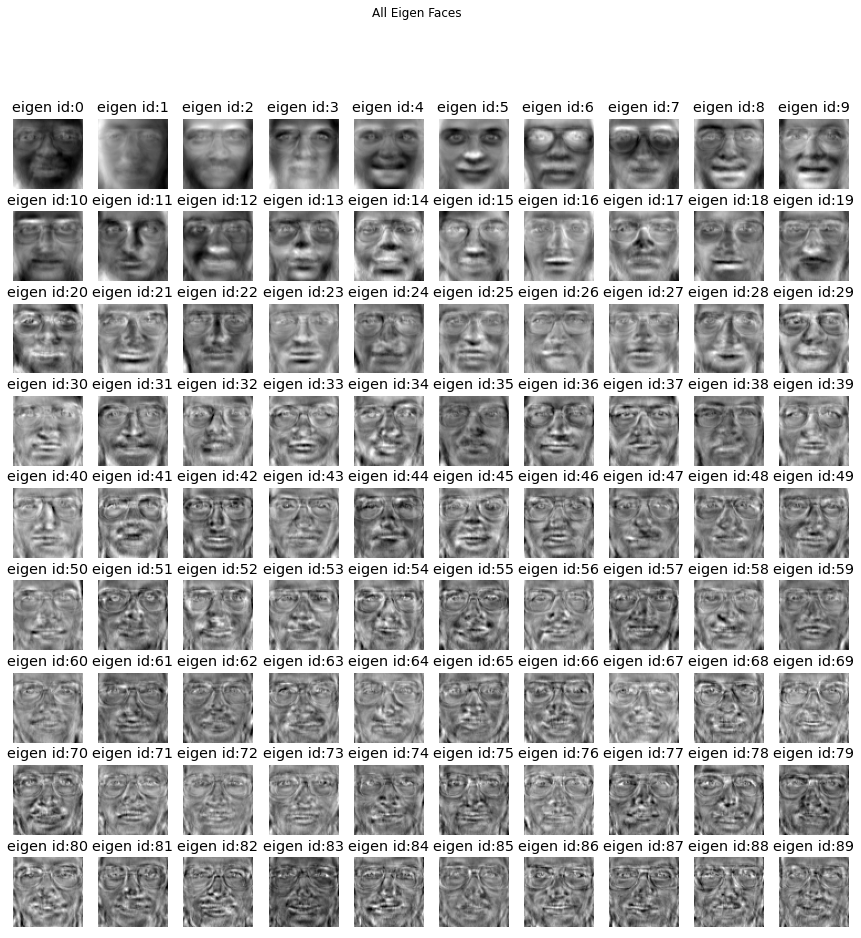

In [23]:
number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, data.shape[1], data.shape[2]))

cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

<br>

### 4.7. Classification Results

In [24]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [25]:
clf = SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print("accuracy score:{:.2f}%".format(metrics.accuracy_score(y_test, y_pred)*100))

accuracy score:90.83%


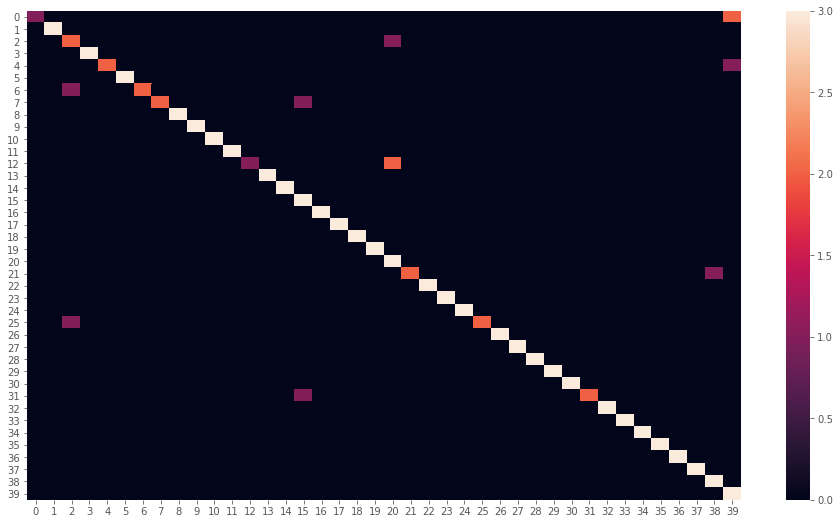

In [26]:
plt.figure(1, figsize=(16, 9))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred))

In [27]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       0.50      0.67      0.57         3
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      0.67      0.80         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.33      0.50         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       0.60      1.00      0.75         3
          16       1.00      1.00      1.00         3
          17       1.00    

<br>

### 4.8. More Results

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

models=[]
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(("Logistic Regression",LogisticRegression()))
models.append(("GaussianNB",GaussianNB()))
models.append(("KNeighbors Classifier",KNeighborsClassifier(n_neighbors=5)))
models.append(("Decision Tree Classifier",DecisionTreeClassifier()))
models.append(("SVM",SVC()))

for name, model in models:
    
    clf=model

    clf.fit(X_train_pca, y_train)

    y_pred=clf.predict(X_test_pca)
    print(10*"=", "{} Result".format(name), 10*"=")
    print("Accuracy score:{:0.2f}".format(metrics.accuracy_score(y_test, y_pred)))
    print()

========== Linear Discriminant Analysis Result ==========
Accuracy score:0.93

========== Logistic Regression Result ==========
Accuracy score:0.93

========== GaussianNB Result ==========
Accuracy score:0.87

========== KNeighbors Classifier Result ==========
Accuracy score:0.68

========== Decision Tree Classifier Result ==========
Accuracy score:0.64

========== SVM Result ==========
Accuracy score:0.91



According to the above results, Linear Discriminant Analysis and Logistic Regression seems to have the best performances.

<br>

### 4.9. Validated Results

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

pca=PCA(n_components=n_components, whiten=True)
pca.fit(X)
X_pca=pca.transform(X)

for name, model in models:
    kfold=KFold(n_splits=5, shuffle=True, random_state=0)
    
    cv_scores=cross_val_score(model, X_pca, target, cv=kfold)
    print("cross validations score for all 5 splits", cv_scores)
    print("{} mean cross validations score:{:.2f}\n".format(name, cv_scores.mean()))

cross validations score for all 5 splits [0.9625 0.975  1.     0.975  0.975 ]
Linear Discriminant Analysis mean cross validations score:0.98

cross validations score for all 5 splits [0.9    0.925  0.975  0.925  0.9375]
Logistic Regression mean cross validations score:0.93

cross validations score for all 5 splits [0.825  0.8    0.6875 0.8125 0.7125]
GaussianNB mean cross validations score:0.77

cross validations score for all 5 splits [0.6625 0.7375 0.65   0.7    0.7125]
KNeighbors Classifier mean cross validations score:0.69

cross validations score for all 5 splits [0.4875 0.45   0.4375 0.4875 0.4625]
Decision Tree Classifier mean cross validations score:0.47

cross validations score for all 5 splits [0.8125 0.9    0.8375 0.925  0.8375]
SVM mean cross validations score:0.86



According to the cross validation scores Linear Discriminant Analysis and Logistic Regression still have best performance.

In [30]:
lr=LinearDiscriminantAnalysis()
lr.fit(X_train_pca, y_train)
y_pred=lr.predict(X_test_pca)
print("Accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy score:0.93


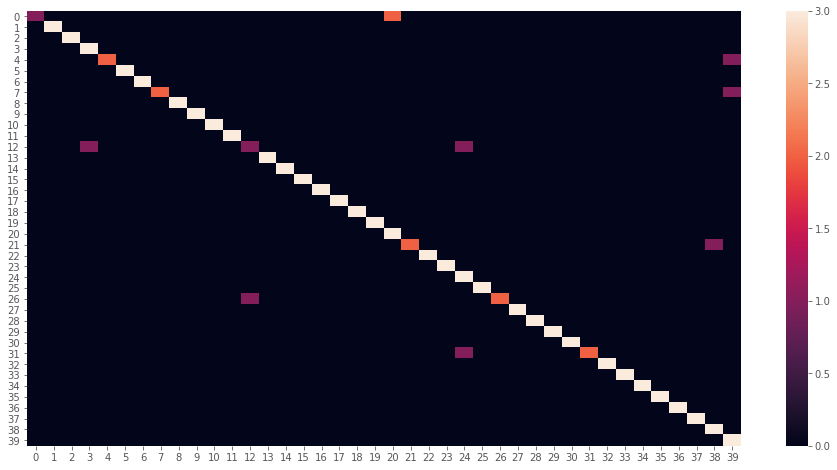

In [31]:
cm=metrics.confusion_matrix(y_test, y_pred)

plt.subplots(1, figsize=(16,8))
sns.heatmap(cm)

In [32]:
print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred)))

Classification Results:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       0.75      1.00      0.86         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       0.50      0.33      0.40         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
   

<br>

### 4.10. More Validated Results: Leave One Out vross-validation

In [33]:
from sklearn.model_selection import LeaveOneOut

In [ ]:
loo_cv=LeaveOneOut()
clf=LogisticRegression()
cv_scores=cross_val_score(clf, X_pca, target, cv=loo_cv)
print("{} Leave One Out cross-validation mean accuracy score:{:.2f}".format(clf.__class__.__name__, cv_scores.mean()))

In [ ]:
loo_cv=LeaveOneOut()
clf=LinearDiscriminantAnalysis()
cv_scores=cross_val_score(clf, X_pca, target, cv=loo_cv)
print("{} Leave One Out cross-validation mean accuracy score:{:.2f}".format(clf.__class__.__name__, cv_scores.mean()))

<br>

### 4.11. Hyperparameter Tunning: GridSearcCV

We can do GridSearchCV to improve model generalization performance. To that we will tune the hyperparameters of Logistic Regression classifier.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params={'penalty':['l2'], 'C':np.logspace(0, 4, 10)}

clf=LogisticRegression()

#kfold=KFold(n_splits=3, shuffle=True, random_state=0)

loo_cv=LeaveOneOut()
gridSearchCV=GridSearchCV(clf, params, cv=loo_cv)
gridSearchCV.fit(X_train_pca, y_train)
print("Grid search fitted..")
print(gridSearchCV.best_params_)
print(gridSearchCV.best_score_)
print("grid search cross validation score:{:.2f}".format(gridSearchCV.score(X_test_pca, y_test)))

In [ ]:
lr=LogisticRegression(C=1.0, penalty="l2")
lr.fit(X_train_pca, y_train)
print("lr score:{:.2f}".format(lr.score(X_test_pca, y_test)))

<br>

### 4.12. Precision-Recall-ROC Curves

Precision-recall curves are for binary classification. In Olivetti dataset, there are 40 distinct classes. Dont worry, sklearn allows us to illustrate the precision-recall in multi-label settings

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

Target=label_binarize(target, classes=range(40))
print(Target.shape)
print(Target[0])

n_classes=Target.shape[1]

In [ ]:
pd.DataFrame(Target)

In [ ]:
X_train_multiclass, X_test_multiclass, y_train_multiclass, y_test_multiclass=train_test_split(X,
                                                                                              Target,
                                                                                              test_size=0.3,
                                                                                              stratify=Target,
                                                                                              random_state=0)

In [ ]:
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train_multiclass)

X_train_multiclass_pca=pca.transform(X_train_multiclass)
X_test_multiclass_pca=pca.transform(X_test_multiclass)

In [ ]:
oneRestClassifier=OneVsRestClassifier(lr)

oneRestClassifier.fit(X_train_multiclass_pca, y_train_multiclass)
y_score=oneRestClassifier.decision_function(X_test_multiclass_pca)
pd.DataFrame(y_score)

In [ ]:
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = metrics.precision_recall_curve(y_test_multiclass[:, i], y_score[:, i])
    average_precision[i] = metrics.average_precision_score(y_test_multiclass[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = metrics.precision_recall_curve(y_test_multiclass.ravel(), y_score.ravel())
average_precision["micro"] = metrics.average_precision_score(y_test_multiclass, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'.format(average_precision["micro"]))

In [ ]:
from funcsigs import signature

step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})
plt.figure(1, figsize=(12,8))
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2, where='post')
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision["micro"]))

<br>

## 5. Linear Discriminant Analysis İle Boyut Azaltma

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=n_components)
X_train_lda = lda.fit(X_train, y_train).transform(X_train)
X_test_lda=lda.transform(X_test)

In [ ]:
lr=LogisticRegression(C=1.0, penalty="l2")
lr.fit(X_train_lda,y_train)
y_pred=lr.predict(X_test_lda)

In [ ]:
print("Accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred)))

#### Réalisé par El Houcine ES SANHAJI

# Thank You